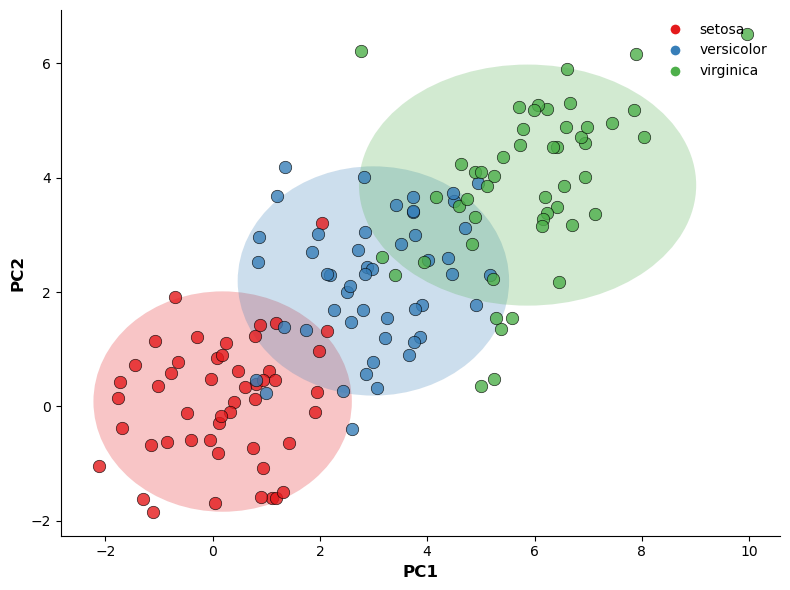

Plot generated successfully!


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Set random seed for reproducibility
np.random.seed(42)

# Generate random data (simulate 3 groups)
n_samples = 50
groups = ['setosa', 'versicolor', 'virginica']
colors = ['#E41A1C', '#377EB8', '#4DAF4A']  # Nature-style colors

# Generate 3 groups of data with different centers
data_list = []
labels_list = []

for i, group in enumerate(groups):
    center = np.array([i*3, i*2])
    cov = np.array([[1.5, 0.5], [0.5, 1.5]])
    data = np.random.multivariate_normal(center, cov, n_samples)
    data_list.append(data)
    labels_list.extend([group] * n_samples)

# Merge all data
X = np.vstack(data_list)
labels = np.array(labels_list)
X_scatter = X

# Function to calculate confidence ellipse
def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', edgecolor='black', alpha=0.3, **kwargs):
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = mpatches.Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                               facecolor=facecolor, edgecolor=edgecolor, alpha=alpha, **kwargs)
    
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    
    transf = plt.matplotlib.transforms.Affine2D() \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Draw confidence ellipses first
for i, group in enumerate(groups):
    mask = labels == group
    x_data = X_scatter[mask, 0]
    y_data = X_scatter[mask, 1]
    
    confidence_ellipse(x_data, y_data, ax, n_std=2.0,
                      facecolor=colors[i], edgecolor=colors[i],
                      alpha=0.25, linewidth=0.01)

# Draw scatter points (with black edge in plot)
legend_handles = []
for i, group in enumerate(groups):
    mask = labels == group
    ax.scatter(X_scatter[mask, 0], X_scatter[mask, 1], 
                c=colors[i],
                s=80, alpha=0.8, 
                edgecolors='black', linewidths=0.5, zorder=3)
    
    # Create custom legend handle (solid circle without edge)
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', 
                                     markerfacecolor=colors[i], markersize=8,
                                     label=group, linestyle=''))

ax.set_xlabel('PC1', fontsize=12, fontweight='bold')
ax.set_ylabel('PC2', fontsize=12, fontweight='bold')
ax.legend(handles=legend_handles, frameon=False, loc='upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
ax.set_facecolor('white')

plt.tight_layout()
plt.savefig('nature_style_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("Plot generated successfully!")
